In [1]:
import numpy as np
import pandas as pd
import sys, os, glob, corner
import matplotlib.pyplot as plt
from jaxstar.utils import *

In [2]:
import seaborn as sns
sns.set(style='ticks', font_scale=1.6, font='sans-serif')
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline

In [3]:
dinput = pd.read_csv("input/simulated-cks3.csv")

In [4]:
dinput["kepid"] = ["%05d"%k for k in dinput.kepid]

In [5]:
postdir = "posteriors_simulated_cks3/"

In [6]:
obskeys = ['teff', 'feh', 'kmag', 'parallax']
keys = ['age', 'mass', 'radius'] + obskeys

In [7]:
dinput

,teff_true,kmag_true,eep_true,radius_true,mass_true,age_true,feh_true,parallax_true,teff_error,feh_error,kmag_error,parallax_error,teff_obs,feh_obs,kmag_obs,parallax_obs,kepid
0,5677.332346,11.613151,406.829092,1.027215,0.871684,11.605074,-0.115279,2.132288,110,0.1,0.023,0.021323,5557.912980,-0.114596,11.631883,2.118723,00000
1,4865.494751,14.605374,364.388436,0.833326,0.836111,11.384065,0.367406,0.720182,110,0.1,0.023,0.007202,4975.202750,0.362885,14.606991,0.721802,00001
2,5974.313571,12.242151,380.208145,1.125602,1.030789,5.136282,-0.015373,1.411870,110,0.1,0.023,0.014119,6005.441206,0.021495,12.242128,1.415822,00002
3,5952.794984,10.083270,346.188515,1.131565,1.131681,2.505597,0.186919,3.788491,110,0.1,0.023,0.037885,5787.102565,0.070016,10.108357,3.801762,00003
4,5577.037109,12.088088,314.857995,0.876302,0.953864,1.643448,0.015341,2.021239,110,0.1,0.023,0.020212,5513.391081,-0.245738,12.147657,2.037398,00004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140,5193.474159,13.829007,359.704343,0.825569,0.812045,10.028851,-0.035835,1.007907,110,0.1,0.023,0.010079,5173.010283,-0.020477,13.844272,1.018419,07140
7141,5864.168635,10.449307,439.501604,1.333313,0.912859,11.030130,-0.226713,2.762769,110,0.1,0.023,0.027628,5932.497533,-0.221138,10.448106,2.770703,07141
7142,6082.219324,9.442259,332.293757,1.019137,1.051036,1.841478,-0.100602,5.611781,110,0.1,0.023,0.056118,6000.348279,-0.151456,9.462492,5.699087,07142
7143,5009.835060,12.257937,326.576345,0.777613,0.832397,3.895905,0.070782,2.247191,110,0.1,0.023,0.022472,4937.581318,0.029900,12.331789,2.268996,07143


In [8]:
dpct = summary_stats(postdir, dinput.kepid, keys).rename({"name": "kepid"}, axis='columns')

# output for 05000 does not exist.
# output for 05001 does not exist.
# output for 05002 does not exist.
# output for 05003 does not exist.
# output for 05004 does not exist.
# output for 05005 does not exist.
# output for 05006 does not exist.
# output for 05007 does not exist.
# output for 05008 does not exist.
# output for 05009 does not exist.
# output for 05010 does not exist.
# output for 05011 does not exist.
# output for 05012 does not exist.
# output for 05013 does not exist.
# output for 05014 does not exist.
# output for 05015 does not exist.
# output for 05016 does not exist.
# output for 05017 does not exist.
# output for 05018 does not exist.
# output for 05019 does not exist.
# output for 05020 does not exist.
# output for 05021 does not exist.
# output for 05022 does not exist.
# output for 05023 does not exist.
# output for 05024 does not exist.
# output for 05025 does not exist.
# output for 05026 does not exist.
# output for 05027 does not exist.
# output for 05028 d

# output for 06941 does not exist.
# output for 06942 does not exist.
# output for 06943 does not exist.
# output for 06944 does not exist.
# output for 06945 does not exist.
# output for 06946 does not exist.
# output for 06947 does not exist.
# output for 06948 does not exist.
# output for 06949 does not exist.
# output for 06950 does not exist.
# output for 06951 does not exist.
# output for 06952 does not exist.
# output for 06953 does not exist.
# output for 06954 does not exist.
# output for 06955 does not exist.
# output for 06956 does not exist.
# output for 06957 does not exist.
# output for 06958 does not exist.
# output for 06959 does not exist.
# output for 06960 does not exist.
# output for 06961 does not exist.
# output for 06962 does not exist.
# output for 06963 does not exist.
# output for 06964 does not exist.
# output for 06965 does not exist.
# output for 06966 does not exist.
# output for 06967 does not exist.
# output for 06968 does not exist.
# output for 06969 d

In [36]:
d = pd.merge(dpct, dinput[["kepid", "eep_true"]+[_k+"_obs" for _k in obskeys]+[_k+"_error" for _k in obskeys]+[_k+"_true" for _k in keys]], on='kepid')

In [37]:
for key in obskeys:
    d["d"+key] = d["iso_"+key] - d[key+"_obs"]
    d["dsigma"+key] = d["d"+key] / d[key+"_error"]
d["dsigmaobs"] = np.sqrt(np.sum(np.array(d[["dsigma"+k for k in obskeys]])**2, axis=1))

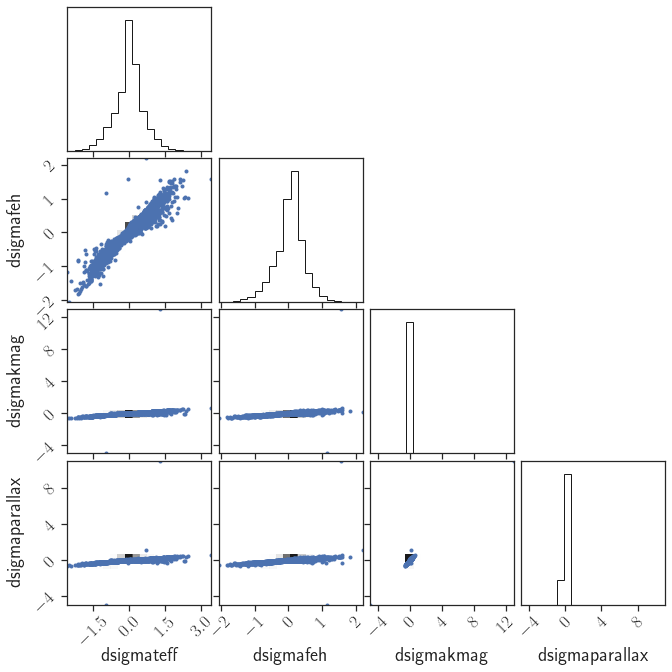

In [11]:
fig = corner.corner(d[["dsigmateff", "dsigmafeh", "dsigmakmag", "dsigmaparallax"]], plot_contours=False)
fig = corner.overplot_points(fig, d[["dsigmateff", "dsigmafeh", "dsigmakmag", "dsigmaparallax"]])

In [38]:
idxgood = (d.dsigmaobs < 2)
d["idx"] = idxgood

In [39]:
d.to_csv("simulated-cks_results3.csv", index=False)

### check stars with large dsigmaobs

In [40]:
sigma = np.std(d.dsigmaobs)
print (sigma)

0.57068519752169


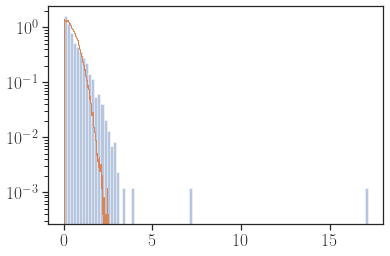

In [41]:
plt.yscale("log")
plt.hist(d.dsigmaobs, bins=100, density=True, alpha=0.4)
plt.hist(np.abs(np.random.randn(int(1e5)))*sigma, bins=100, density=True, histtype='step');

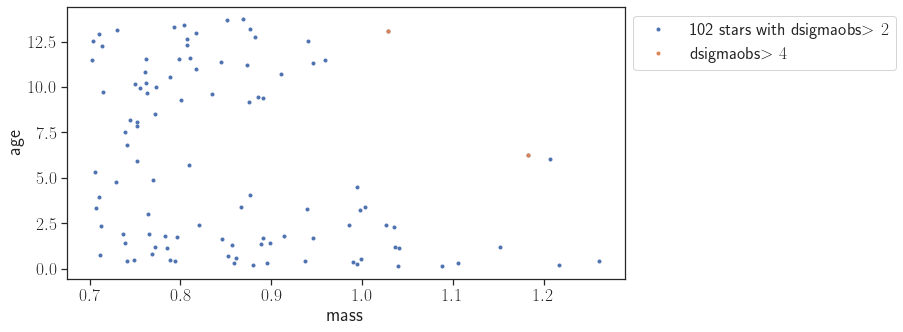

In [85]:
plt.figure(figsize=(10,5))
plt.xlabel("mass")
plt.ylabel('age')
idxd = d.dsigmaobs > 2
plt.plot(d[idxd].mass_true, d[idxd].age_true, '.', label='%d stars with dsigmaobs$>2$'%np.sum(idxd))
idxd = d.dsigmaobs > 4
plt.plot(d[idxd].mass_true, d[idxd].age_true, '.', label='dsigmaobs$>4$')
plt.legend(loc='best', bbox_to_anchor=(1,1));

In [83]:
d[d.dsigmaobs>5][['mass_true', 'teff_true', 'radius_true', 'age_true', 'feh_true', 'eep_true', 'iso_mass', 'iso_age']]

,mass_true,teff_true,radius_true,age_true,feh_true,eep_true,iso_mass,iso_age
1853,1.028015,4404.417500,6.728454,13.060805,0.386304,507.104529,1.025108,13.714711
3645,1.182512,4058.840339,26.798526,6.272871,0.005741,552.529769,2.029052,1.259124


In [73]:
sidx = 3645

In [74]:
filename = postdir + "%s_samples.csv"%d.kepid[sidx]
smp = pd.read_csv(filename)

In [75]:
[None]*3+list(d.iloc[sidx][[_k+"_obs" for _k in obskeys]])

[None,
 None,
 None,
 4146.564266165503,
 0.0937588275777215,
 5.448585209894741,
 1.7044497338258466]

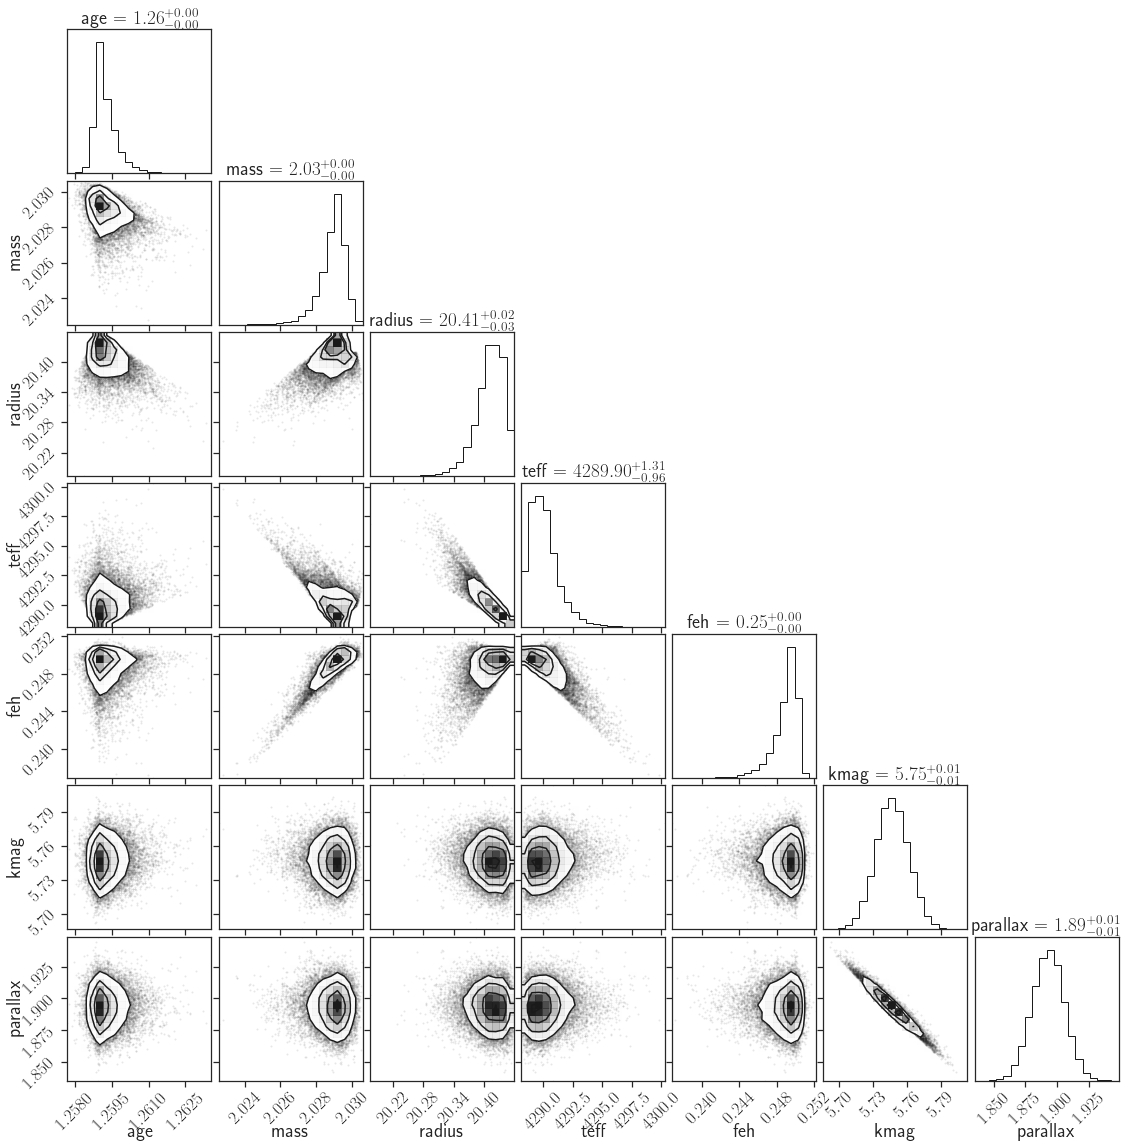

In [76]:
fig = corner.corner(smp[keys], truths=list(d.iloc[sidx][['age_true', 'mass_true', 'radius_true']])+list(d.iloc[sidx][[_k+"_obs" for _k in obskeys]]), 
                    show_titles=True, title_fmt='.2f')